###  학습된 모델의 가중치 불러온 뒤 결과 데이터 프레임으로 저장

In [ ]:
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR 
import Model.ANNs_class as ANN
import utils.evaluation as ev
import torch
from Model.Train_Test_dataset import test_x_sc_tn, test_y_sc_tn, train_x_sc_tn, train_y_sc_tn, y_scaler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=20, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 10)  
tree_regressor = joblib.load('trained_model/tree_regressor.pkl')

knr = KNeighborsRegressor( algorithm= 'auto', n_neighbors= 3, p =1, weights= 'uniform')  # distance 로 하면 과적합 나옴 
knr = joblib.load('trained_model/knr.pkl')

rf_regressor = RandomForestRegressor(max_depth= 10, max_features= 'auto', n_estimators=900, random_state=42)
rf_regressor = joblib.load('trained_model/rf_regressor.pkl')

xgb_model = xgb.XGBRegressor(random_state = 42, learning_rate = 0.4, max_depth = 2, n_estimators = 100, objective='reg:logistic')
xgb_model = joblib.load('trained_model/xgb_model.pkl')

svr_model = SVR( C = 200, degree = 1, gamma = 0.1, kernel= 'rbf', epsilon=0.05)
svr_model = joblib.load('trained_model/svr_model.pkl')

model4 = ANN.ANN_batch_4(14,83,39,49,83,1).to(device).double()
model4.load_state_dict(torch.load("trained_model/ANN4_90_0304.pt"))
model4.eval()

pinn5 = ANN.ANN_batch_4(14,83,39,49,83,1).to(device).double()
pinn5.load_state_dict(torch.load("trained_model/Pinn4_58_24_.pt"))
pinn5.eval()

# train_result
pinn_train_df = ev.output_result_df(train_x_sc_tn,train_y_sc_tn, pinn5, 'ANN4')
dnn_train_df = ev.output_result_df(train_x_sc_tn,train_y_sc_tn, model4, 'ANN4')
ACI_train_df= ev.output_result_df(train_x_sc_tn, train_y_sc_tn, None, 'ACI')
SVR_train_df = ev.output_result_df(train_x_sc_tn, train_y_sc_tn, svr_model, 'SVR')
XGB_train_df = ev.output_result_df(train_x_sc_tn, train_y_sc_tn, xgb_model, 'XGB')
KNN_train_df= ev.output_result_df(train_x_sc_tn, train_y_sc_tn, knr, 'KNN')
DT_train_df = ev.output_result_df(train_x_sc_tn, train_y_sc_tn, tree_regressor, 'DT')
RF_train_df = ev.output_result_df(train_x_sc_tn, train_y_sc_tn, rf_regressor, 'RF')

# test_result
pinn_test_df = ev.output_result_df(test_x_sc_tn,test_y_sc_tn, pinn5, 'ANN4')
dnn_test_df= ev.output_result_df(test_x_sc_tn,test_y_sc_tn, model4, 'ANN4')
ACI_test_df= ev.output_result_df(test_x_sc_tn, test_y_sc_tn, None, 'ACI')
SVR_test_df = ev.output_result_df(test_x_sc_tn, test_y_sc_tn, svr_model, 'SVR')
XGB_test_df = ev.output_result_df(test_x_sc_tn, test_y_sc_tn, xgb_model, 'XGB')
KNN_test_df= ev.output_result_df(test_x_sc_tn, test_y_sc_tn, knr, 'KNN')
DT_test_df = ev.output_result_df(test_x_sc_tn, test_y_sc_tn, tree_regressor, 'DT')
RF_test_df = ev.output_result_df(test_x_sc_tn, test_y_sc_tn, rf_regressor, 'RF')

# model_pf_train
xgb_train_pf = ev.print_model_performance('XGB',xgb_model,train_x_sc_tn,train_y_sc_tn, device, y_scaler, 'XGB')
svr_train_pf = ev.print_model_performance('SVR',svr_model, train_x_sc_tn,train_y_sc_tn, device, y_scaler, 'SVR')
rf_train_pf = ev.print_model_performance('RF',rf_regressor, train_x_sc_tn,train_y_sc_tn, device, y_scaler, 'RF')
knn_train_pf = ev.print_model_performance('KNN',knr, train_x_sc_tn,train_y_sc_tn, device, y_scaler, 'KNN')
dt_train_pf = ev.print_model_performance('DT',tree_regressor, train_x_sc_tn,train_y_sc_tn, device, y_scaler, 'DT')
dnn_train_pf = ev.print_model_performance('ANN4',model4, train_x_sc_tn, train_y_sc_tn, device, y_scaler, 'DNN')
pinn_train_pf =ev.print_model_performance('ANN4',pinn5, train_x_sc_tn, train_y_sc_tn, device, y_scaler, 'PINN') 

# model_pf_test
dnn_test_pf = ev.print_model_performance('ANN4',model4, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'DNN')
pinn_test_pf =ev.print_model_performance('ANN4',pinn5, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'PINN') 
xgb_test_pf = ev.print_model_performance('XGB',xgb_model, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'XGB')
svr_test_pf = ev.print_model_performance('SVR',svr_model, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'SVR')
rf_test_pf = ev.print_model_performance('RF',rf_regressor, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'RF')
knn_test_pf = ev.print_model_performance('KNN',knr, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'KNN')
dt_test_pf = ev.print_model_performance('DT',tree_regressor, test_x_sc_tn, test_y_sc_tn, device, y_scaler, 'DT')

print('-----------TEST-----------')
print(xgb_test_pf,'\n',svr_test_pf,'\n',rf_test_pf,'\n',knn_test_pf,'\n',dt_test_pf,'\n',dnn_test_pf,'\n',pinn_test_pf)
print('-----------TRAIN-----------')
print(xgb_train_pf,'\n',svr_train_pf,'\n',rf_train_pf,'\n',knn_train_pf,'\n',dt_train_pf,'\n',dnn_train_pf,'\n',pinn_train_pf)

/data2/sdb1_envs/Hwa_t1/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-----------TEST-----------
{'Title': 'XGB', 'cov': 0.13506212293722636, 'rmse': 72.84930464396189, 'mape': 0.11155425460834918, 'mae': 58.154873841517215, 'r2': 0.8465534015110966} 
 {'Title': 'SVR', 'cov': 0.1967196122295582, 'rmse': 78.93333697386534, 'mape': 0.12149898001387184, 'mae': 62.24338145999932, 'r2': 0.8198528603024382} 
 {'Title': 'RF', 'cov': 0.1632495982979512, 'rmse': 83.79924670501939, 'mape': 0.14247938883474665, 'mae': 68.1168216134526, 'r2': 0.7969576302389055} 
 {'Title': 'KNN', 'cov': 0.20470179810183486, 'rmse': 114.11525415585854, 'mape': 0.17476848586236596, 'mae': 82.13177175230642, 'r2': 0.6234749733444972} 
 {'Title': 'DT', 'cov': 0.2213836186983815, 'rmse': 113.21853859024672, 'mape': 0.18318673991197723, 'mae': 90.78005633876163, 'r2': 0.6293691771751356} 
 {'Title': 'DNN', 'cov': 0.11709316075795426, 'rmse': array(57.00946584), 'mape': array(0.09246489), 'mae': array(43.46036004), 'r2': 0.9060275850007997} 
 {'Title': 'PINN', 'cov': 0.16262939775415677, 

## 출력값과 기존 데이터 No.병합
### 각 모델의 출력값이 존재하는 Total df  생성 

In [ ]:
# 출력값 데이터프레임 생성
import pandas as pd

def change_df(model_name, train_df, test_df):
    train_df['data_type'] = 'train'
    train_df.rename(columns = {'Predict': f'{model_name}_predict'}, inplace= True)
    test_df['data_type'] = 'test'
    test_df.rename(columns = {'Predict': f'{model_name}_predict'}, inplace= True)
    total_df = pd.concat([train_df, test_df], ignore_index=True)
    return total_df

model_name_list = ['pinn', 'DNN', 'SVR', 'XGB', 'KNN', 'DT', 'RF']
train_df_list = [pinn_train_df, dnn_train_df, SVR_train_df, XGB_train_df, KNN_train_df, DT_train_df, RF_train_df]
test_df_list = [pinn_test_df, dnn_test_df, SVR_test_df, XGB_test_df, KNN_test_df, DT_test_df, RF_test_df]

merged_df_list = []

# 각 모델별로 change_df 함수 적용
for name, train_df, test_df in zip(model_name_list, train_df_list, test_df_list):
    merged_df = change_df(name, train_df, test_df)  # 함수 적용
    merged_df_list.append(merged_df)  # 리스트에 저장


total_df = merged_df_list[0]
total_df = total_df.merge(merged_df_list[1]['DNN_predict'], left_index=True, right_index=True)
total_df = total_df.merge(merged_df_list[2]['SVR_predict'], left_index=True, right_index=True)
total_df = total_df.merge(merged_df_list[3]['XGB_predict'], left_index=True, right_index=True)
total_df = total_df.merge(merged_df_list[4]['KNN_predict'], left_index=True, right_index=True)
total_df = total_df.merge(merged_df_list[5]['DT_predict'], left_index=True, right_index=True)
total_df = total_df.merge(merged_df_list[6]['RF_predict'], left_index=True, right_index=True)
total_df.drop(columns = ['Label / Predict']) # 출력값의 데이터 프레임 

,Ld/db,pinn_predict,Label,data_type,DNN_predict,SVR_predict,XGB_predict,KNN_predict,DT_predict,RF_predict
0,8.5,259.4,251.0,train,266.0,232.300003,233.500000,251.000000,293.799988,282.899994
1,6.5,598.7,807.6,train,776.1,784.500000,806.799988,807.599976,829.900024,781.599976
2,7.0,364.7,424.0,train,415.8,377.600006,411.299988,424.000000,478.399994,429.899994
3,9.4,452.1,539.3,train,543.2,528.900024,531.700012,539.299988,445.100006,549.000000
4,14.4,660.3,827.6,train,822.5,842.400024,809.900024,827.599976,774.900024,792.000000
...,...,...,...,...,...,...,...,...,...,...
265,4.0,526.3,721.0,test,718.2,758.599976,721.799988,719.000000,711.299988,728.700012
266,10.1,470.7,613.1,test,606.4,560.500000,613.000000,592.400024,614.200012,540.799988
267,12.1,406.9,491.8,test,460.5,393.600006,402.399994,370.799988,336.399994,431.799988
268,10.0,565.9,592.5,test,529.2,623.099976,565.200012,397.399994,548.700012,548.400024


### Total df의 Label 값을 실제 Fsu 값으로 변경 

In [ ]:
from Model.Train_Test_dataset import  test_y_unsc_tn, ML_train_y_unsc_np
test_y_unsc_np = test_y_unsc_tn.detach().cpu().numpy()
ML_train_y_unsc_df = pd.Series(ML_train_y_unsc_np.ravel())
test_y_unsc_df = pd.Series(test_y_unsc_np.ravel())

#ML_train_y_unsc_np + test_y_unsc_tn
real_Label= pd.concat([ML_train_y_unsc_df, test_y_unsc_df], axis=0, ignore_index=True)

total_df1 = total_df.copy()
total_df1['Label'] = real_Label[:]
total_df1.drop(columns = 'Label / Predict') # 출력값의 데이터 프레임의 Label 값을 실제 Fsu 값으로 변경 

,Ld/db,pinn_predict,Label,data_type,DNN_predict,SVR_predict,XGB_predict,KNN_predict,DT_predict,RF_predict
0,8.5,259.4,251.034483,train,266.0,232.300003,233.500000,251.000000,293.799988,282.899994
1,6.5,598.7,807.586207,train,776.1,784.500000,806.799988,807.599976,829.900024,781.599976
2,7.0,364.7,424.000000,train,415.8,377.600006,411.299988,424.000000,478.399994,429.899994
3,9.4,452.1,539.310345,train,543.2,528.900024,531.700012,539.299988,445.100006,549.000000
4,14.4,660.3,827.586207,train,822.5,842.400024,809.900024,827.599976,774.900024,792.000000
...,...,...,...,...,...,...,...,...,...,...
265,4.0,526.3,721.000000,test,718.2,758.599976,721.799988,719.000000,711.299988,728.700012
266,10.1,470.7,613.103448,test,606.4,560.500000,613.000000,592.400024,614.200012,540.799988
267,12.1,406.9,491.755543,test,460.5,393.600006,402.399994,370.799988,336.399994,431.799988
268,10.0,565.9,592.500000,test,529.2,623.099976,565.200012,397.399994,548.700012,548.400024


### 사용했던 기존 데이터인 used_data를 불러와 인덱스를 구분 해주는 컬럼 생성 (Number_2)

In [ ]:
from Model.Train_Test_dataset import used_data
used_data = used_data[["No.","Fsu at La, test", "Ld"]]
used_data['Number_'] = (used_data["Ld"]/used_data['Fsu at La, test'])*10
used_data.drop(columns= 'Ld')
used_data.columns = [col + '2' for col in used_data.columns]
used_data #Number_2 컬럼이 존재하는 데이터 프레임 

/data2/sdb1_envs/Hwa_t1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,No.2,"Fsu at La, test2",Ld2,Number_2
137,138.0,119.721038,479.000,40.009676
141,142.0,118.787276,217.000,18.267950
145,146.0,112.745098,161.000,14.280000
146,147.0,312.500000,301.000,9.632000
147,148.0,417.000000,301.000,7.218225
...,...,...,...,...
426,427.0,837.931034,485.902,5.798830
427,428.0,568.965517,495.300,8.705273
428,429.0,607.586207,489.966,8.064140
429,430.0,626.206897,492.252,7.860852


### Total df 을 All Total df으로 변경
#### - input 값으로 사용한 X 값이 포함된 데이터 프레임으로 병합
#### - used_data와 같이 인덱스를 구분할 수 있는 Number_ 컬럼 생성

In [ ]:
from Model.Train_Test_dataset import train_df, test_df
origin_train_df = train_df
origin_test_df =  test_df

origin_total_df = pd.concat([origin_train_df, origin_test_df], axis = 0, ignore_index=True)

All_total_df = pd.concat([origin_total_df, total_df1], axis = 1, ignore_index=False)
All_total_df['Number_'] = (All_total_df["Ld"]/All_total_df["Fsu at La, test"])*10
All_total_df

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,...,pinn_predict,Label,data_type,DNN_predict,SVR_predict,XGB_predict,KNN_predict,DT_predict,RF_predict,Number_
0,931.034483,304.800,27.310345,35.814,551.18,68.58,78.74,342.392,2.0,508.000000,...,259.4,251.034483,train,266.0,232.300003,233.500000,251.000000,293.799988,282.899994,12.141758
1,958.620690,103.886,76.068966,15.875,332.74,66.04,130.81,168.910,2.0,133.350000,...,598.7,807.586207,train,776.1,784.500000,806.799988,807.599976,829.900024,781.599976,1.286377
2,583.000000,401.100,51.400000,57.300,584.46,57.30,56.00,355.260,2.0,174.400000,...,364.7,424.000000,train,415.8,377.600006,411.299988,424.000000,478.399994,429.899994,9.459906
3,827.586207,238.252,46.827586,25.400,383.54,63.50,82.55,205.740,2.0,260.350000,...,452.1,539.310345,train,543.2,528.900024,531.700012,539.299988,445.100006,549.000000,4.417716
4,799.310345,365.252,34.275862,25.400,439.42,67.31,81.28,254.000,2.0,260.350000,...,660.3,827.586207,train,822.5,842.400024,809.900024,827.599976,774.900024,792.000000,4.413462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,679.000000,88.800,129.900000,22.200,366.00,22.20,29.20,277.200,2.0,59.200000,...,526.3,721.000000,test,718.2,758.599976,721.799988,719.000000,711.299988,728.700012,1.231623
266,889.655172,256.540,33.655172,25.400,444.50,68.58,80.01,256.540,2.0,508.000000,...,470.7,613.103448,test,606.4,560.500000,613.000000,592.400024,614.200012,540.799988,4.184286
267,556.000000,432.000,31.400000,35.800,305.00,76.00,76.00,81.400,2.0,280.000000,...,406.9,491.755543,test,460.5,393.600006,402.399994,370.799988,336.399994,431.799988,8.784853
268,606.000000,430.000,81.200000,43.000,541.80,43.00,56.00,369.800,2.0,224.166667,...,565.9,592.500000,test,529.2,623.099976,565.200012,397.399994,548.700012,548.400024,7.257384


## Number_ 과 Number_2 정렬하여 No. 맞추는 최종 데이터 프레임 Final_df 출력

In [15]:
sorted_All_total_df = All_total_df.sort_values(by= 'Number_')
sorted_used_data =used_data.sort_values(by = 'Number_2')

sorted_All_total_df = sorted_All_total_df.reset_index(drop=True)
sorted_used_data = sorted_used_data.reset_index(drop=True)

Final_df = pd.concat([sorted_All_total_df, sorted_used_data], axis=1)  
Final_df['ACI'] = (Final_df['Ld']*(Final_df['fcm']**(1/2)))/(0.19*Final_df['db'])
Final_df

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,...,XGB_predict,KNN_predict,DT_predict,RF_predict,Number_,No.2,"Fsu at La, test2",Ld2,Number_2,ACI
0,661.00000,88.800,225.500000,22.200,366.00,22.20,29.2,277.20,2.0,59.200000,...,767.299988,842.000000,750.200012,810.099976,1.047788,174.0,847.500000,88.800,1.047788,316.140156
1,661.00000,88.800,225.500000,22.200,366.00,22.20,29.2,277.20,2.0,59.200000,...,767.299988,842.000000,750.200012,810.099976,1.061566,175.0,836.500000,88.800,1.061566,316.140156
2,958.62069,104.902,76.068966,15.875,332.74,64.77,127.0,171.45,2.0,133.350000,...,887.099976,896.599976,829.900024,864.799988,1.170061,372.0,896.551724,104.902,1.170061,303.333369
3,679.00000,88.800,129.900000,22.200,388.00,33.30,29.2,277.00,2.0,59.200000,...,722.599976,718.500000,711.299988,715.500000,1.224828,180.0,725.000000,88.800,1.224828,239.944592
4,667.00000,88.800,225.500000,22.200,396.00,22.20,82.2,307.20,2.0,59.200000,...,710.599976,724.500000,711.299988,742.700012,1.225673,177.0,724.500000,88.800,1.225673,316.140156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,606.00000,688.000,41.800000,43.000,344.00,43.00,56.0,172.00,2.0,358.666667,...,488.799988,424.000000,548.700012,495.399994,16.226415,159.0,424.000000,688.000,16.226415,544.445638
266,583.00000,744.900,40.500000,57.300,584.46,57.30,56.0,355.26,2.0,376.600000,...,473.299988,439.000000,478.399994,481.500000,16.968109,167.0,439.000000,744.900,16.968109,435.428913
267,583.00000,916.800,41.800000,57.300,584.46,57.30,56.0,355.26,2.0,491.200000,...,478.299988,515.000000,478.399994,486.299988,17.976471,172.0,510.000000,916.800,17.976471,544.445638
268,450.60000,217.000,24.600000,35.800,220.00,92.10,205.0,0.00,1.0,369.000000,...,144.500000,198.899994,198.899994,168.199997,18.267950,142.0,118.787276,217.000,18.267950,158.230667


## Origin에 사용하기 위한 데이터 프레임

In [ ]:
# 기존 데이터와 최종 데이터 갖고오기
Used_data = pd.read_excel("/data2/Hwa_Projects/Predict_Anchorage_HeadedBars/Final_file_share/Model/Used_data.xlsx",engine = 'openpyxl')
Excel_df = pd.DataFrame(Used_data, columns= ['No.','Author', 'Ld', 'db', 'Ntr', 'test/ACI', 'test/Thompson', 'test/MC2010', 'Shao', 'Fsu at La, test'])
Model_result_df = pd.DataFrame(Final_df, columns = ['No.2', 'Label', 'data_type', 'pinn_predict','DNN_predict', 'SVR_predict', 'XGB_predict', 'KNN_predict','DT_predict', 'RF_predict','ACI'])
# No.에 맞게 정렬 하기 
Excel_df_sorted = Excel_df.sort_values(by='No.').reset_index(drop=True)
Model_result_df_sorted = Model_result_df.sort_values(by='No.2').reset_index(drop=True)
# 열 방향으로 병합
Origin_df = pd.concat([Excel_df_sorted, Model_result_df_sorted], axis=1)
Origin_df['ld/db'] = Origin_df['Ld'] / Origin_df['db']
Origin_df.columns

Index(['No.', 'Author', 'Ld', 'db', 'Ntr', 'test/ACI', 'test/Thompson',
       'test/MC2010', 'Shao', 'Fsu at La, test', 'No.2', 'Label', 'data_type',
       'pinn_predict', 'DNN_predict', 'SVR_predict', 'XGB_predict',
       'KNN_predict', 'DT_predict', 'RF_predict', 'ACI', 'ld/db'],
      dtype='object')

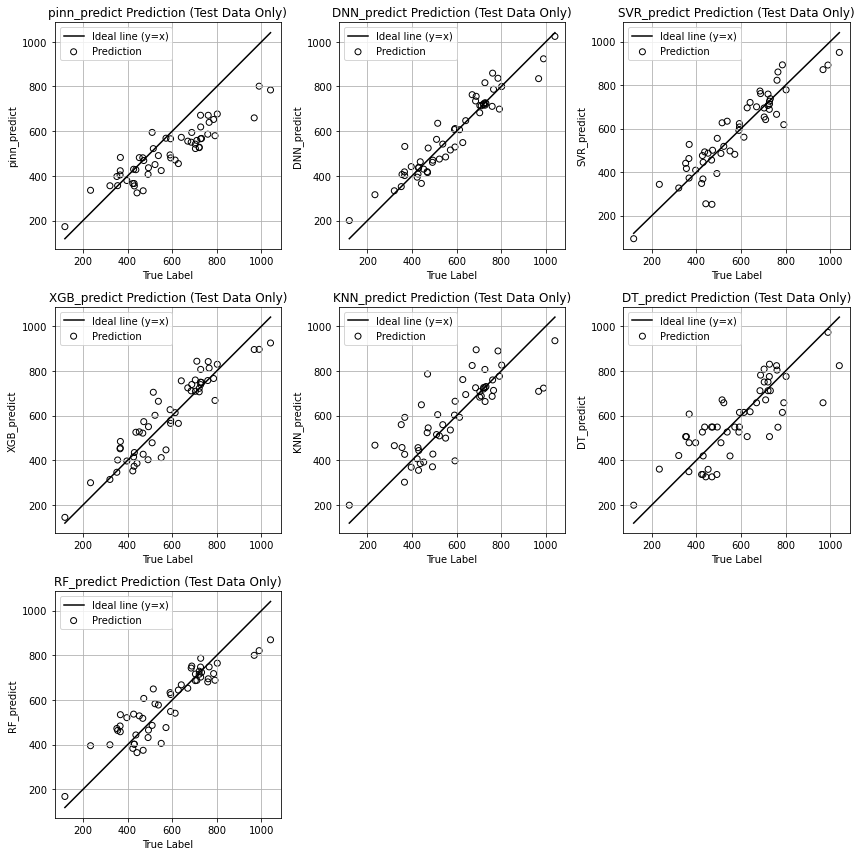

In [ ]:
import matplotlib.pyplot as plt

# 'data_type'이 'test'인 행만 필터링
Origin_test_df = Origin_df[Origin_df['data_type'] == 'test']

# 3x3 형식으로 Figure 1의 모든 모델을 하나의 그림에 출력 (test 데이터만)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

model_list = ['pinn_predict', 'DNN_predict', 'SVR_predict', 'XGB_predict',
              'KNN_predict', 'DT_predict', 'RF_predict']

for i, model in enumerate(model_list):
    ax = axes[i]
    ax.scatter(Origin_test_df['Label'], Origin_test_df[model], facecolors='none', edgecolors='black', label='Prediction')
    ax.plot([Origin_test_df['Label'].min(), Origin_test_df['Label'].max()],
            [Origin_test_df['Label'].min(), Origin_test_df['Label'].max()],
            'k-', label='Ideal line (y=x)')
    ax.set_xlabel("True Label")
    ax.set_ylabel(f"{model}")
    ax.set_title(f"{model} Prediction (Test Data Only)")
    ax.legend()
    ax.grid(True)

# 빈 서브플롯 제거
for j in range(len(model_list), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


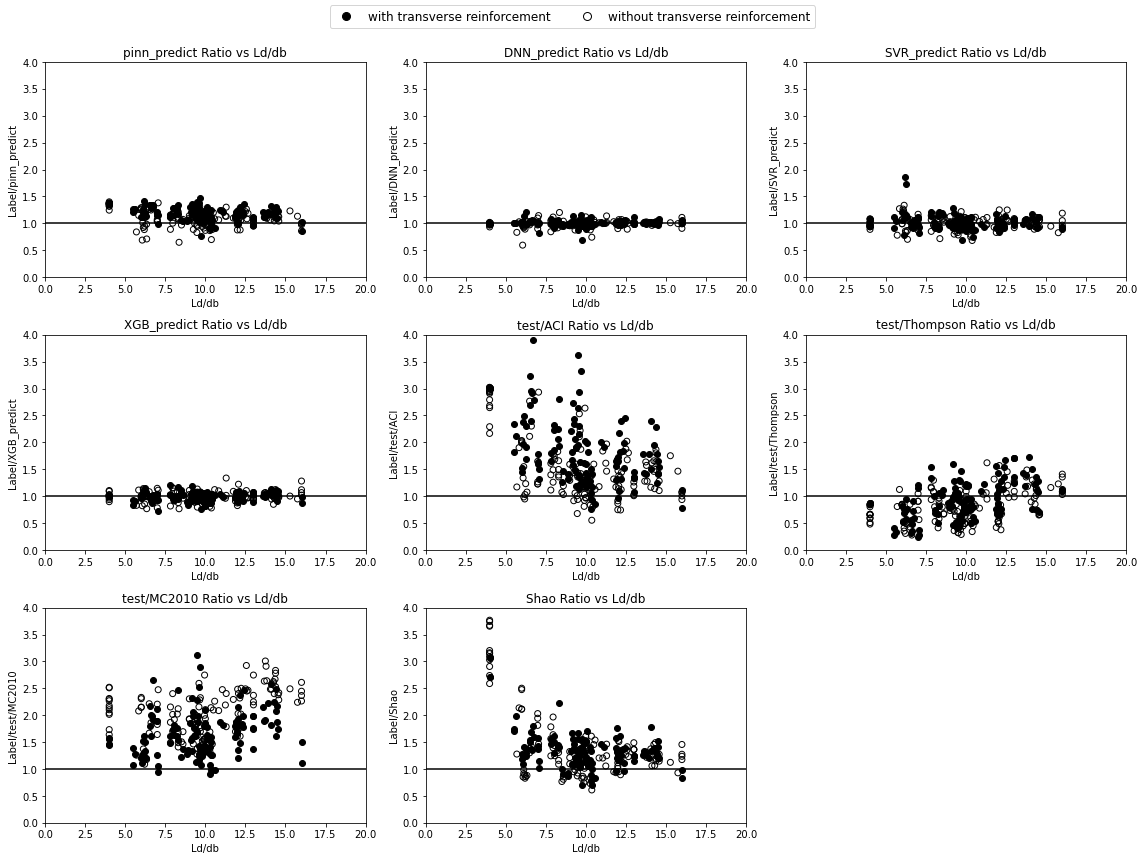

In [37]:

# 개별 리스트로 다시 정의
model_list_fig2 = ['pinn_predict', 'DNN_predict', 'SVR_predict', 'XGB_predict']
model_list_fig3 = ['test/ACI', 'test/Thompson', 'test/MC2010', 'Shao']
combined_models = model_list_fig2 + model_list_fig3

# 전체 그림 생성
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

# 색 설정 (검정색, with trans: 채움 / without trans: 비채움)
colors = ['black'] * len(Origin_df)
facecolors = ['black' if ntr > 0 else 'none' for ntr in Origin_df['Ntr']]
labels = ['with trans' if ntr > 0 else 'without trans' for ntr in Origin_df['Ntr']]

# 그림 반복
for i, model in enumerate(combined_models):
    ax = axes[i]

    if model in model_list_fig2:
        ratio = Origin_df['Label']/Origin_df[model] 
    else:
        ratio = Origin_df[model]

    for j in range(len(Origin_df)):
        ax.scatter(Origin_df['ld/db'].iloc[j], ratio.iloc[j],
                   facecolors=facecolors[j],
                   edgecolors=colors[j],
                   label=labels[j] if j == 0 or j == 1 else "")

    ax.axhline(y=1, color='black', linestyle='-')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 4)
    ax.set_xlabel('Ld/db')
    ax.set_ylabel(f'Label/{model}')
    ax.set_title(f'{model} Ratio vs Ld/db')
    ax.grid(False)

# 빈 subplot 제거
for j in range(len(combined_models), 9):
    fig.delaxes(axes[j])

# 범례 추가
handles = [
    plt.Line2D([0], [0], marker='o', color='black', label='with transverse reinforcement',
               markerfacecolor='black', markersize=8, linestyle = 'None'),
    plt.Line2D([0], [0], marker='o', color='black', label='without transverse reinforcement',
               markerfacecolor='none', markersize=8, linestyle = 'None')
]
fig.legend(handles=handles, loc='upper center', ncol=2, fontsize='large')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#Origin_df.to_excel('used_data/Origin_df.xlsx', index=False) # 예측한 결과 값과 실제 값 넘버링이 있는 데이터 

### Fig10 그리기

In [43]:
import pandas as pd
import numpy as np

df = pd.read_excel('used_data/Final_0301.xlsx', skiprows = 18, engine = 'openpyxl', sheet_name= 'Sheet1' )
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st",  "Group"]) # st 제거시


X = df[[ "No.","Author","Group", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover","st", "Ah/Ab",'Ntr','dtr', "Test type", "Fsu at La, test",]] 

X = X.dropna() # null 있는 행 삭제 #251개 
X = X[X["Fsu at La, test"] != 0] # fsu =0 값 삭제 

# test_type 종류별 갯수
count_by_category = X['Test type'].value_counts()
#print(count_by_category)

X_Joint_type = X[X["Test type"] == "Joint type"]
X_Joint = X_Joint_type.drop("Test type", axis= 1)

print(X_Joint)

    No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
0   186   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
1   187   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
2   188   Chun   db1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
3   189   Chun   db1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
4   190   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
..  ...    ...   ...    ...    ...    ...   ...    ...      ...   ...    ...   
92  158   Chun  csi2  606.0  688.0   45.8  43.0  430.0     86.0  56.0  172.0   
93  155   Chun  csi3  606.0  559.0   40.5  43.0  344.0     43.0  56.0  172.0   
94  156   Chun  csi3  606.0  559.0   41.8  43.0  430.0     86.0  56.0  172.0   
95  151   Chun  csi4  606.0  430.0   52.2  43.0  541.8     43.0  56.0  369.8   
96  151   Chun  csi4  606.0  430.0   52.2  43.0  541.8     43.0  56.0  369.8   

    Nh  Bottom cover     st  Ah/Ab  Ntr

    No.    Author Group     fy     Ld        fcm    db      b  cos,avg   cth  \
14  205  Bashandy   fy1  578.0  211.0  35.133333  25.4  305.0     38.0  76.0   
15  214  Bashandy   fy1  578.0  211.0  35.133333  25.4  305.0     76.0  76.0   
16  215  Bashandy   fy1  578.0  211.0  35.133333  25.4  305.0     76.0  76.0   

       ch  Nh  Bottom cover     st     Ah/Ab  Ntr  dtr  Fsu at La, test  \
14  178.2   2         280.0  211.0  6.315281    0  0.0       351.287493   
15  102.2   2         280.0  211.0  6.315281    0  0.0       430.228503   
16  102.2   2         280.0  211.0  3.205005    0  0.0       361.155119   

          ACI  
14  259.15215  
15  259.15215  
16  259.15215       No. Author Group          fy       Ld        fcm    db       b  cos,avg  \
17  285   Shao   fy2  827.586207  361.950  34.224138  25.4  429.26    62.23   
18  281   Shao   fy2  827.586207  365.252  34.224138  25.4  431.80    64.77   
19  231   Shao   fy2  827.586207  388.112  34.224138  25.4  497.84    97.79  

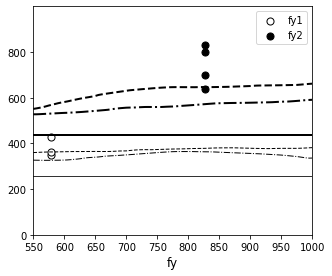

    No. Author Group          fy       Ld        fcm      db       b  cos,avg  \
37  423   Shao   Ld1  931.034483  425.450  69.793103  35.814  556.26    71.12   
38  419   Shao   Ld1  931.034483  426.974  69.793103  35.814  568.96    71.12   
39  421   Shao   Ld1  931.034483  429.768  69.793103  35.814  556.26    71.12   
40  417   Shao   Ld1  931.034483  430.276  69.793103  35.814  566.42    72.39   

      cth       ch  Nh  Bottom cover       st  Ah/Ab  Ntr   dtr  \
37  83.82  153.289   3         508.0  101.600    6.5   12  12.7   
38  78.74  355.092   2         508.0  101.600    6.5   12  12.7   
39  88.90  153.289   3         508.0  429.768    6.5    0   0.0   
40  86.36  350.012   2         508.0  430.276    6.5    0   0.0   

    Fsu at La, test  
37       680.000000  
38       872.413793  
39       482.068966  
40       777.931034  
    No. Author Group          fy       Ld        fcm      db       b  cos,avg  \
41  381   Shao   Ld2  931.034483  420.624  27.931034  35.814  556.2

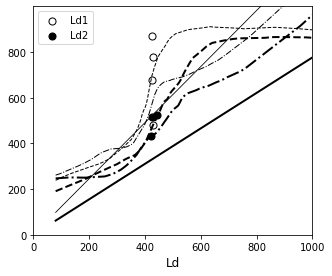

    No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
21  186   Chun   cb1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
22  187   Chun   cb1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
23  188   Chun   cb1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
24  189   Chun   cb1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
25  192   Chun   cb1  649.0  190.8  129.9  31.8  396.0     31.8  65.2  268.8   
26  193   Chun   cb1  649.0  190.8  129.9  31.8  396.0     31.8  65.2  268.8   

    Nh  Bottom cover     st  Ah/Ab  Ntr  dtr  Fsu at La, test  
21   2          84.8  127.2    5.0    0  0.0            707.0  
22   2          84.8  127.2    5.0    0  0.0            704.0  
23   2          84.8  127.2    5.0    0  0.0            725.5  
24   2          84.8  127.2    5.0    0  0.0            721.0  
25   2         127.2  190.8    5.0    0  0.0            715.5  
26   2         127.2  190.8    5.0    0  0.0           

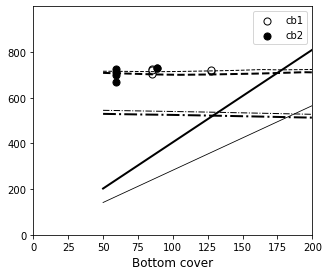

    No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
33  190   Chun   cb3  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
34  191   Chun   cb3  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   

    Nh  Bottom cover    st  Ah/Ab  Ntr   dtr  Fsu at La, test  
33   2          84.8  64.0    5.0    2  12.7            724.0  
34   2          84.8  64.0    5.0    2  12.7            722.5  
    No. Author Group     fy    Ld    fcm    db      b  cos,avg   cth     ch  \
35  182   Chun   cb4  679.0  88.8  129.9  22.2  366.0     22.2  29.2  277.2   
36  183   Chun   cb4  679.0  88.8  129.9  22.2  366.0     22.2  29.2  277.2   

    Nh  Bottom cover    st  Ah/Ab  Ntr  dtr  Fsu at La, test  
35   2          59.2  52.0    5.0    2  9.5            721.0  
36   2          59.2  52.0    5.0    2  9.5            719.0  


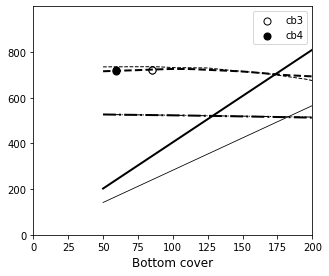

    No. Author Group     fy     Ld   fcm    db       b  cos,avg   cth      ch  \
89  172   Chun  csi1  583.0  916.8  41.8  57.3  584.46     57.3  56.0  355.26   
90  173   Chun  csi1  583.0  916.8  41.8  57.3  699.06    114.6  56.0  355.26   

    Nh  Bottom cover     st  Ah/Ab  Ntr  dtr  Fsu at La, test  
89   2         491.2  916.8    5.0    0  0.0            510.0  
90   2         491.2  916.8    5.0    0  0.0            588.0  
    No. Author Group     fy     Ld   fcm    db      b  cos,avg   cth     ch  \
91  157   Chun  csi2  606.0  688.0  45.8  43.0  344.0     43.0  56.0  172.0   
92  158   Chun  csi2  606.0  688.0  45.8  43.0  430.0     86.0  56.0  172.0   

    Nh  Bottom cover     st  Ah/Ab  Ntr  dtr  Fsu at La, test  
91   2    358.666667  688.0    5.0    0  0.0            572.0  
92   2    358.666667  688.0    5.0    0  0.0            607.0  


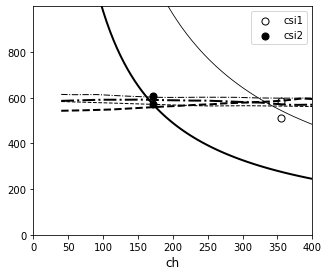

    No. Author Group     fy     Ld   fcm    db      b  cos,avg   cth     ch  \
93  155   Chun  csi3  606.0  559.0  40.5  43.0  344.0     43.0  56.0  172.0   
94  156   Chun  csi3  606.0  559.0  41.8  43.0  430.0     86.0  56.0  172.0   

    Nh  Bottom cover     st  Ah/Ab  Ntr   dtr  Fsu at La, test  
93   2    272.666667  120.0    5.0    2  15.9            468.0  
94   2    272.666667  120.0    5.0    2  15.9            644.0  
    No. Author Group     fy     Ld   fcm    db      b  cos,avg   cth     ch  \
95  151   Chun  csi4  606.0  430.0  52.2  43.0  541.8     43.0  56.0  369.8   
96  151   Chun  csi4  606.0  430.0  52.2  43.0  541.8     43.0  56.0  369.8   

    Nh  Bottom cover     st  Ah/Ab  Ntr   dtr  Fsu at La, test  
95   2    224.166667  370.0    5.0    1  15.9            493.5  
96   2    224.166667  370.0    5.0    1  15.9            493.5  


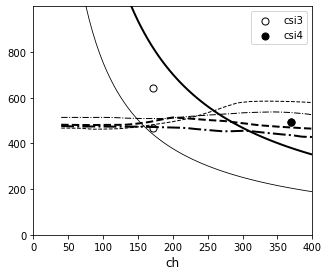

    No. Author Group     fy     Ld   fcm    db       b  cos,avg   cth      ch  \
78  153   Chun  cso1  606.0  559.0  45.8  43.0  344.00     43.0  56.0  172.00   
79  164   Chun  cso1  583.0  573.0  51.4  57.3  584.46     57.3  56.0  355.26   

    Nh  Bottom cover     st  Ah/Ab  Ntr  dtr  Fsu at La, test  
78   2    272.666667  559.0    5.0    0  0.0            475.0  
79   2    289.000000  573.0    5.0    0  0.0            367.0  
    No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
81  180   Chun  cso2  679.0   88.8  129.9  22.2  388.0     33.3  29.2  277.0   
82  181   Chun  cso2  679.0   88.8  129.9  22.2  388.0     33.3  29.2  277.0   
83  188   Chun  cso2  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
84  189   Chun  cso2  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   

    Nh  Bottom cover     st  Ah/Ab  Ntr  dtr  Fsu at La, test  
81   2          59.2   88.8    5.0    0  0.0            725.0  
82   2          59.2   88.8    5.0 

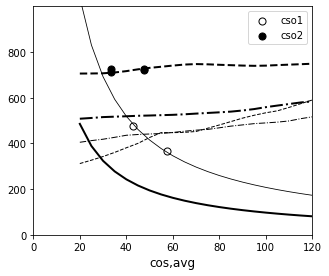

    No. Author Group     fy     Ld   fcm    db       b  cos,avg   cth      ch  \
77  155   Chun  cso3  606.0  559.0  40.5  43.0  344.00     43.0  56.0  172.00   
80  165   Chun  cso3  583.0  573.0  51.4  57.3  584.46     57.3  56.0  355.26   

    Nh  Bottom cover     st  Ah/Ab  Ntr   dtr  Fsu at La, test  
77   2    272.666667  120.0    5.0    2  15.9            468.0  
80   2    289.000000  275.0    5.0    2  15.9            472.5  
    No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
85  182   Chun  cso4  679.0   88.8  129.9  22.2  366.0     22.2  29.2  277.2   
86  183   Chun  cso4  679.0   88.8  129.9  22.2  366.0     22.2  29.2  277.2   
87  190   Chun  cso4  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
88  191   Chun  cso4  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   

    Nh  Bottom cover    st  Ah/Ab  Ntr   dtr  Fsu at La, test  
85   2          59.2  52.0    5.0    2   9.5            721.0  
86   2          59.2  52.0    5.

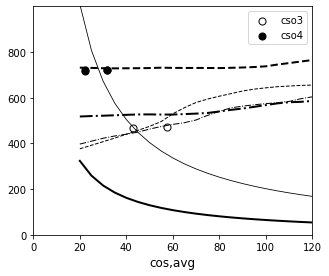

   No. Author Group     fy     Ld    fcm    db      b  cos,avg   cth     ch  \
0  186   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
1  187   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
2  188   Chun   db1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
3  189   Chun   db1  649.0  127.2  129.9  31.8  428.0     47.7  43.8  269.0   
4  190   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
5  191   Chun   db1  649.0  127.2  129.9  31.8  396.0     31.8  43.8  268.8   
6  184   Chun   db1  679.0  133.2  129.9  22.2  366.0     22.2  42.8  277.2   
7  185   Chun   db1  679.0  133.2  129.9  22.2  366.0     22.2  42.8  277.2   

   Nh  Bottom cover     st  Ah/Ab  Ntr   dtr  Fsu at La, test  
0   2          84.8  127.2    5.0    0   0.0            707.0  
1   2          84.8  127.2    5.0    0   0.0            704.0  
2   2          84.8  127.2    5.0    0   0.0            725.5  
3   2          84.8  127.2    5.

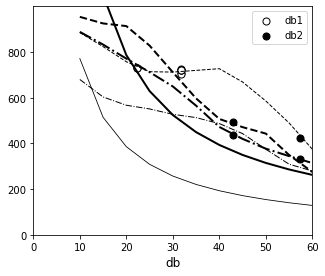

    No. Author Group     fy     Ld   fcm    db      b  cos,avg   cth     ch  \
53  157   Chun  fcm1  606.0  688.0  45.8  43.0  344.0     43.0  56.0  172.0   
54  158   Chun  fcm1  606.0  688.0  45.8  43.0  430.0     86.0  56.0  172.0   
55  159   Chun  fcm1  606.0  688.0  41.8  43.0  344.0     43.0  56.0  172.0   
56  160   Chun  fcm1  606.0  688.0  44.3  43.0  430.0     86.0  56.0  172.0   

    Nh  Bottom cover     st  Ah/Ab  Ntr   dtr  Fsu at La, test  
53   2    358.666667  688.0    5.0    0   0.0            572.0  
54   2    358.666667  688.0    5.0    0   0.0            607.0  
55   2    358.666667  120.0    5.0    2  15.9            424.0  
56   2    358.666667  120.0    5.0    2  15.9            628.0  
    No. Author Group     fy     Ld   fcm    db       b  cos,avg   cth      ch  \
57  164   Chun  fcm2  583.0  573.0  51.4  57.3  584.46     57.3  56.0  355.26   
58  165   Chun  fcm2  583.0  573.0  51.4  57.3  584.46     57.3  56.0  355.26   
59  166   Chun  fcm2  583.0  573.0  

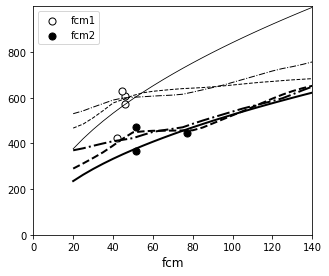

In [45]:
from Model.Train_Test_dataset import x_scaler
X_Joint.describe()
Final_df = X_Joint.copy()

class make_df:
    def __init__(self, df, group_list):
        self.df = df
        self.group_list = group_list
        
    def mean_data(self):
        choice_first_g = self.df[self.df["Group"]== self.group_list[0]]
        choice_second_g = self.df[self.df["Group"]== self.group_list[1]]
        
            # 숫자 컬럼만 선택하여 평균 계산
        first_g = choice_first_g.mean(numeric_only=True).to_frame().T
        second_g = choice_second_g.mean(numeric_only=True).to_frame().T

        # 'Group' 컬럼을 다시 추가
        first_g["Group"] = self.group_list[0]
        second_g["Group"] = self.group_list[1]
        
        return choice_first_g, choice_second_g, first_g, second_g
    
class make_df_fy:
    def __init__(self, df, group_list):
        self.df = df
        self.group_list = group_list
        
    def mean_data(self):
        choice_first_g = self.df[self.df["Group"]== self.group_list[0]]
        choice_second_g = self.df[self.df["Group"]== self.group_list[1]]
        
        first_g = choice_first_g.copy()
        second_g = choice_second_g.copy()
        
        first_g['fcm'] = first_g['fcm'].mean()
        first_g['Ld'] = first_g['Ld'].mean()
        first_g['db'] = first_g['db'].mean()
        first_g['fy'] = first_g['fy'].mean() 
        
        second_g['fcm'] = second_g['fcm'].mean()
        second_g['Ld'] = second_g['Ld'].mean()
        second_g['db'] = second_g['db'].mean()
        second_g['fy'] = second_g['fy'].mean()
        
        return choice_first_g, choice_second_g, first_g, second_g
    
def fy_mean(choice_g, g):
    Lds = choice_g['Ld']
    db = g['db'].values[0]
    fcm = g['fcm'].values[0]
    ACI_values = [(Ld * (fcm ** (1/2))) / (0.19 * db) for Ld in Lds]
    g1 = g.copy()
    g1['Ld'] = Lds
    g1['ACI'] = ACI_values
    return g1

def make_data(mean_g, x_col):
    if x_col == 'fcm':
        Ld = mean_g['Ld'].values[0]
        db = mean_g['db'].values[0]
        #fcm_values = np.arange(25, 135, 5)
        fcm_values = np.linspace(20,140, num=((140-20)//5)+1) 
        ACI_values = [ (Ld * (fcm ** (1/2))) / (0.19 * db) for fcm in fcm_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['fcm'] = fcm_values
        expanded_data['ACI'] = ACI_values
        return expanded_data
    
    elif x_col == 'fy':
        Ld = mean_g['Ld'].values[0]
        fcm = mean_g['fcm'].values[0]
        db = mean_g['db'].values[0]
        fy_values = np.linspace(550, 900, num=((900-550)//5)+1) 
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(fy_values))
        expanded_data['fy'] = fy_values
        return expanded_data
    
    elif x_col == 'db':
        Ld = mean_g['Ld'].values[0]
        fcm = mean_g['fcm'].values[0]
        #db_values = np.arange(14, 60, 5)
        db_values = np.linspace(10, 60, num=((60-10)//5)+1) 
        ACI_values = [(Ld * (fcm ** (1/2))) / (0.19 * db) for db in db_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['db'] = db_values
        expanded_data['ACI'] = ACI_values
        return expanded_data
        
    elif x_col == "cos,avg":    
        Ld = mean_g['Ld'].values[0]
        db = mean_g['db'].values[0]
        fcm = mean_g['fcm'].values[0]
        cso = mean_g["cos,avg"].values[0]
        n = cso/db
        #cso_values = np.arange(22, 115, 5)  
        cso_values = np.linspace(20,120, num=((120-20)//5)+1)
        ACI_values = [((Ld * (fcm ** (1/2))) / (0.19 * cso))*n for cso in cso_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['cos,avg'] = cso_values
        expanded_data['ACI'] = ACI_values
        return expanded_data

    elif x_col == "ch":    
        Ld = mean_g['Ld'].values[0]
        db = mean_g['db'].values[0]
        fcm = mean_g['fcm'].values[0]
        ch = mean_g["ch"].values[0]
        n = (ch/db)+1
        #ch_values = np.arange(44, 370, 5)  
        ch_values = np.linspace(40,400, num = ((400-40)//5)+1) # 44-370
        ACI_values = [ ((Ld * (fcm ** (1/2))) / (0.19 * ch))*(n-1) for ch in ch_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['ch'] = ch_values
        expanded_data['ACI'] = ACI_values
        return expanded_data

    elif x_col == "Bottom cover":    
        db = mean_g['db'].values[0]
        fcm = mean_g['fcm'].values[0]
        #cb_values = np.arange(58, 508, 5)
        cb_values = np.linspace(50, 200, num = ((200-50)//5)+1) # 58-508  
        ACI_values = [ ((cb*1.5* (fcm ** (1/2))) / (0.19 * db)) for cb in cb_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['Bottom cover'] = cb_values
        expanded_data['ACI'] = ACI_values
        return expanded_data
    else: # Ld
        db = mean_g['db'].values[0]
        fcm = mean_g['fcm'].values[0]
        Ld_values = np.linspace(80, 1000, num=((1000 - 80) // 5) + 1)
        ACI_values = [((Ld* (fcm ** (1/2))) / (0.19 * db)) for Ld in Ld_values]
        base_row = mean_g.iloc[0].copy()
        expanded_data = pd.DataFrame([base_row] * len(ACI_values))
        expanded_data['Ld'] = Ld_values
        expanded_data['ACI'] = ACI_values
        return expanded_data

fy_graph_data1 = make_df_fy(Final_df, ['fy1','fy2'])
fy1, fy2, fy1_m, fy2_m = fy_graph_data1.mean_data()
fy1_m1 = fy_mean(fy1, fy1_m)
fy2_m2 = fy_mean(fy2, fy2_m)

Ld_graph_data = make_df(Final_df, ['Ld1','Ld2'])
Ld1, Ld2, Ld1_m, Ld2_m = Ld_graph_data.mean_data()
Ld_group1 = make_data(Ld1_m, 'Ld')
Ld_group2 = make_data(Ld2_m, 'Ld')

fcm_graph_data = make_df(Final_df, ['fcm1','fcm2'])
fcm1, fcm2, fcm1_m, fcm2_m = fcm_graph_data.mean_data()
fcm_group1 = make_data(fcm1_m, 'fcm')
fcm_group2 = make_data(fcm2_m, 'fcm')

db_graph_data = make_df(Final_df, ['db1','db2'])
db1, db2, db1_m, db2_m = db_graph_data.mean_data()
db_group1 = make_data(db1_m, 'db')
db_group2 = make_data(db2_m, 'db')

cso_graph_data = make_df(Final_df, ['cso1','cso2'])
cso1, cso2, cso1_m, cso2_m = cso_graph_data.mean_data()
cso_group1 = make_data(cso1_m, 'cos,avg')
cso_group2 = make_data(cso2_m, 'cos,avg')

cso_graph_data_confine = make_df(Final_df, ['cso3','cso4'])
cso3, cso4, cso3_m, cso4_m = cso_graph_data_confine.mean_data()
cso_group3 = make_data(cso3_m, 'cos,avg')
cso_group4 = make_data(cso4_m, 'cos,avg')

csi_graph_data = make_df(Final_df, ['csi1','csi2'])
csi1, csi2, csi1_m, csi2_m = csi_graph_data.mean_data()
csi_group1 = make_data(csi1_m, 'ch')
csi_group2 = make_data(csi2_m, 'ch')

csi_graph_data_confine = make_df(Final_df, ['csi3','csi4'])
csi3, csi4, csi3_m, csi4_m = csi_graph_data_confine.mean_data()
csi_group3 = make_data(csi3_m, 'ch')
csi_group4 = make_data(csi4_m, 'ch')

cb_graph_data = make_df(Final_df, ['cb1','cb2'])
cb1, cb2, cb1_m, cb2_m = cb_graph_data.mean_data()
cb_group1 = make_data(cb1_m, 'Bottom cover')
cb_group2 = make_data(cb2_m, 'Bottom cover')

cb_graph_data_confine = make_df(Final_df, ['cb3','cb4'])
cb3, cb4, cb3_m, cb4_m = cb_graph_data_confine.mean_data()
cb_group3 = make_data(cb3_m, 'Bottom cover')
cb_group4 = make_data(cb4_m, 'Bottom cover')


def make_np_pred_y(df, model):
    selected_columns = ["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "st", "Ah/Ab", "Ntr", "dtr"]
    main_df = df[selected_columns]
    x_sc_tn = x_scaler.transform(torch.tensor(main_df.values, dtype = torch.float64, requires_grad = True ))
    y_pred = model(x_sc_tn)
    unscaled_y_pred_model = y_scaler.inverse_transform(y_pred).detach().cpu().numpy()
    
    return unscaled_y_pred_model

def make_graph(origin, group1, group2, ann_model, pinn_model, x_col):
    if x_col == 'fy':
        aci_x1 = group1[x_col].mean()
        aci_y1 = group1['ACI'].mean()

        aci_x2 = group2[x_col].mean()
        aci_y2 = group2['ACI'].mean()
        
        fy_values1 = np.linspace(550,1000, num=((1000-550)//5)+1) 
        base_row1 = group1.iloc[0].copy()
        expanded_data1 = pd.DataFrame([base_row1] * len(fy_values1))
        expanded_data1['fy'] = fy_values1
        
        fy_values2 = np.linspace(550,1000, num=((1000-550)//5)+1) 
        base_row2 = group2.iloc[0].copy()
        expanded_data2 = pd.DataFrame([base_row2] * len(fy_values2))
        expanded_data2['fy'] = fy_values2

        ann_y1 = make_np_pred_y(expanded_data1, ann_model)
        pinn_y1 = make_np_pred_y(expanded_data1, pinn_model)

        ann_y2 = make_np_pred_y(expanded_data2, ann_model)
        pinn_y2 = make_np_pred_y(expanded_data2, pinn_model)
        
        scatter_x1 = group1[x_col]
        scatter_y1 = group1['Fsu at La, test']
        scatter_x2 = group2[x_col]
        scatter_y2 = group2['Fsu at La, test']
        fig = plt.figure(figsize=(5,4.2))#,facecolor='white')
        plt.plot(fy_values2, expanded_data1['ACI'], linestyle='-', linewidth=0.8, color='black')
        plt.plot(fy_values2, ann_y1, linestyle='--', linewidth=1, color='black')
        plt.plot(fy_values2, pinn_y1, linestyle='dashdot', linewidth=1, color='black')
        plt.scatter(scatter_x1, scatter_y1, edgecolors='black',facecolor= 'white', marker='o', s=50, label= group1['Group'].iloc[0])

        plt.plot(fy_values2, expanded_data2['ACI'],  linestyle='-', linewidth=2, color='black')
        plt.plot(fy_values2, ann_y2,  linestyle='--', linewidth=2, color='black')
        plt.plot(fy_values2, pinn_y2, linestyle='dashdot', linewidth=2, color='black')
        plt.scatter(scatter_x2, scatter_y2, color = 'black',marker='o', s=50, label = group2['Group'].iloc[0])

        plt.xlim([550, 1000])
        plt.ylim([0, 1000])
        plt.yticks(np.arange(0, 1000, 200)) 
        plt.xlabel(x_col, fontsize=12)  # 원하는 x축 이름 넣기
        plt.legend()

        #plt.gca().set_aspect('equal')  
        plt.show()
        
    else:   
        aci_x1 = group1[x_col]
        aci_y1 = group1['ACI']

        aci_x2 = group2[x_col]
        aci_y2 = group2['ACI']

        ann_y1 = make_np_pred_y(group1, ann_model)
        pinn_y1 = make_np_pred_y(group1, pinn_model)

        ann_y2 = make_np_pred_y(group2, ann_model)
        pinn_y2 = make_np_pred_y(group2, pinn_model)

        scatter_x1 = origin[origin['Group']== group1['Group'].values[0]][x_col]
        scatter_y1 = origin[origin['Group']== group1['Group'].values[0]]['Fsu at La, test']
        scatter_x2 = origin[origin['Group']== group2['Group'].values[0]][x_col]
        scatter_y2 = origin[origin['Group']== group2['Group'].values[0]]['Fsu at La, test']
        fig = plt.figure(figsize=(5,4.2))#,facecolor='white')
        plt.plot(aci_x1, aci_y1, linestyle='-', linewidth=0.8, color='black')
        plt.plot(aci_x1, ann_y1, linestyle='--', linewidth=1, color='black')
        plt.plot(aci_x1, pinn_y1, linestyle='dashdot', linewidth=1, color='black')
        plt.scatter(scatter_x1, scatter_y1, edgecolors='black',facecolor= 'white', marker='o', s=50, label= group1['Group'].iloc[0])

        plt.plot(aci_x2, aci_y2,  linestyle='-', linewidth=2, color='black')
        plt.plot(aci_x2, ann_y2,  linestyle='--', linewidth=2, color='black')
        plt.plot(aci_x2, pinn_y2, linestyle='dashdot', linewidth=2, color='black')
        plt.scatter(scatter_x2, scatter_y2, color = 'black',marker='o', s=50, label= group2['Group'].iloc[0])

        x_max = max(max(aci_x1), max(aci_x2))
        y_min = min(min(aci_y1), min(aci_y2))
        y_max = max(max(aci_y1), max(aci_y2))

        plt.xlim([0, x_max])
        plt.ylim([0, 1000])
        plt.yticks(np.arange(0, 1000, 200)) 
        plt.xlabel(x_col, fontsize=12)  # 원하는 x축 이름 넣기
         
        plt.legend()

        #plt.gca().set_aspect('equal')  
        plt.show()

#fff= make_fy_graph(fy1_m1, fy2_m2, fy3_m1, fy4_m2,model4, pinn3, 'fy' )
print(fy1_m1, fy2_m2)
ff = make_graph(Final_df, fy1_m1, fy2_m2, model4, pinn5, 'fy' )
print(Ld1)
print(Ld2)
x_Ld = make_graph(Final_df, Ld_group1, Ld_group2, model4, pinn5, 'Ld')
print(cb1)
print(cb2)
x_cb = make_graph(Final_df, cb_group1, cb_group2, model4, pinn5, 'Bottom cover')
print(cb3)
print(cb4)
x_cb_confine = make_graph(Final_df, cb_group3, cb_group4, model4, pinn5, 'Bottom cover')
print(csi1)
print(csi2)
x_csi = make_graph(Final_df, csi_group1, csi_group2, model4, pinn5, 'ch')
print(csi3)
print(csi4)
x_csi_confine = make_graph(Final_df, csi_group3, csi_group4, model4, pinn5, 'ch')
print(cso1)
print(cso2)
x_cso = make_graph(Final_df, cso_group1, cso_group2, model4, pinn5, 'cos,avg')
print(cso3)
print(cso4)
x_cso_confine = make_graph(Final_df, cso_group3, cso_group4, model4, pinn5, 'cos,avg')
print(db1)
print(db2)
x_db = make_graph(Final_df, db_group1, db_group2, model4, pinn5, 'db')
print(fcm1)
print(fcm2)
x_fcm = make_graph(Final_df, fcm_group1, fcm_group2,model4, pinn5, 'fcm' )
